# Optical Imagery

This resource will be updated on 8/28, 9/4, and 9/11.

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Arrow
import matplotlib.dates as mdates

## Images and Data

### Digital Images
Images stored in a digital format are stored with 3-4 numbers describing the constituent colors that make up a given color we see. For example, consider the following image of the progress pride flag, which we read in with numpy:

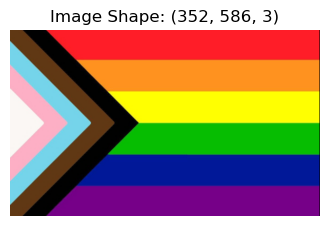

In [2]:
# read in the image
im = Image.open('../images/progress_pride_flag.jpg')
im = np.asarray(im)

# show the image with its size
fig = plt.figure(figsize=(4,3))
C = plt.imshow(im)
plt.axis('off')
plt.title('Image Shape: '+str(np.shape(im)))
plt.show()

As we can see in the plot above, the `progress_pride_flag.jpg` image is stored with three dimensions: the number of pixels in the x- and y-directions (586 and 352, respectively) as well as a third dimension for each consitutent color. For `jpg` images, these layers correspond to the red, green, and blue colors used to make up the colors on a computer screen. Other coloring schemes use different types of color combinations - for example, printers use cyan, maroon, and yellow to construct colors in a similar fashion. We can observe these constituent colors by plotting their intensity individually:

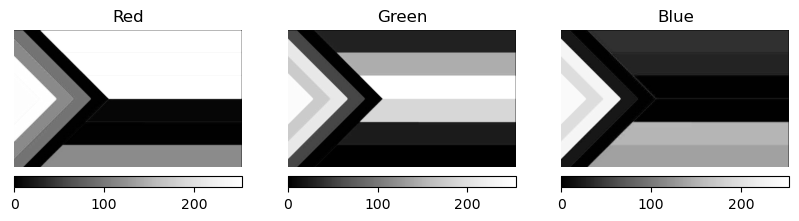

In [3]:
plt.figure(figsize=(10,3))

plt.subplot(1,3,1)
C = plt.imshow(im[:,:,0],cmap='Greys_r',vmin=0, vmax=254)
plt.axis('off')
plt.colorbar(C,pad=0.04,orientation='horizontal')
plt.title('Red')

plt.subplot(1,3,2)
C = plt.imshow(im[:,:,1],cmap='Greys_r',vmin=0, vmax=254)
plt.axis('off')
plt.colorbar(C,pad=0.04,orientation='horizontal')
plt.title('Green')

plt.subplot(1,3,3)
C = plt.imshow(im[:,:,2],cmap='Greys_r',vmin=0, vmax=254)
plt.axis('off')
plt.colorbar(C,pad=0.04,orientation='horizontal')
plt.title('Blue')

plt.show()

### Optical Satellite Images
Much like digital images, satellite images are composed of separate layers called "bands" that store information about a given "scene". However, unlink digital images using red, green, and blue pixel values to reconstruct a given image, optical satellite images are composed of measured reflectances at different wavelengths of the electro-magnetic spectrum.

## Optical Imagery Satellites

Optical imagery is one of the most common types of data collected by satellites. As a result, there are many different types of optical data with varying resolution and purposes. Here, we detail two satellite programs: the U.S. Landsat program and the European Sentinel program.

Under construction.

#### The Landsat Program

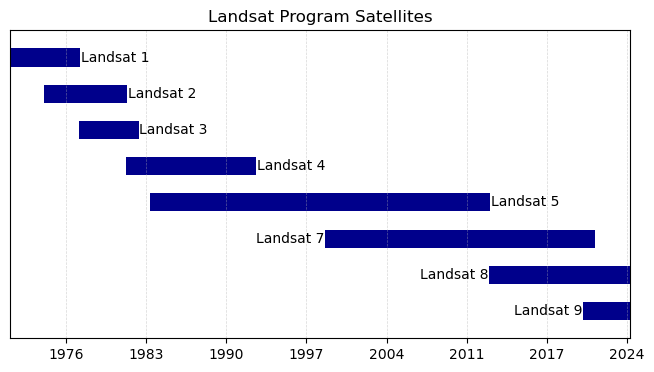

In [4]:
# define the landsat program dates
sat_dates = {'Landsat 1':(np.datetime64('1972-01-01'),np.datetime64('1978-01-21')),
             'Landsat 2':(np.datetime64('1975-01-01'),np.datetime64('1982-01-21')),
             'Landsat 3':(np.datetime64('1978-01-01'),np.datetime64('1983-01-21')),
             'Landsat 4':(np.datetime64('1982-01-01'),np.datetime64('1993-01-21')),
             'Landsat 5':(np.datetime64('1984-01-01'),np.datetime64('2013-01-21')),
             'Landsat 7':(np.datetime64('1999-01-01'),np.datetime64('2022-01-21')),
             'Landsat 8':(np.datetime64('2013-01-01'),np.datetime64('2024-12-31')),
             'Landsat 9':(np.datetime64('2021-01-01'),np.datetime64('2024-12-31'))}
sat_names = list(sat_dates.keys())

# make a figure
plt.figure(figsize=(8, np.ceil(len(sat_names)/2)))

# plot the date boxes
for s in range(len(sat_names)):
    launch_date = sat_dates[sat_names[s]][0]
    decommission_date = sat_dates[sat_names[s]][1]
    sat_rect = Rectangle((launch_date,s*0.5),
                          decommission_date - launch_date,
                          0.25, facecolor='darkblue')
    plt.gca().add_patch(sat_rect)
    if decommission_date<np.datetime64('2017-02-01'):
        plt.text(decommission_date + np.timedelta64(4,'W'), s*0.5+0.125, sat_names[s], ha='left', va='center')
    else:
        plt.text(launch_date - np.timedelta64(4,'W'), s*0.5+0.125, sat_names[s], ha='right', va='center')

# format the axes
plt.gca().set_xlim([np.datetime64('1972-02-01'),np.datetime64('2025-01-01')])
plt.gca().set_ylim([np.ceil(len(sat_names)/2),-0.25])
myFmt = mdates.DateFormatter('%Y')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.gca().set_yticks([])
plt.title('Landsat Program Satellites')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()